In [8]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import requests
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
from bs4 import BeautifulSoup
from collections import Counter
import seaborn as sns

In [2]:
url = "https://millercenter.org/the-presidency/presidential-speeches/september-24-2024-address-79th-united-nations-general-assembly"
html = requests.get(url).text
soup = BeautifulSoup(html, "lxml")

transcript = soup.find("div", {"class":"view-transcript"})
#print(transcript.text)

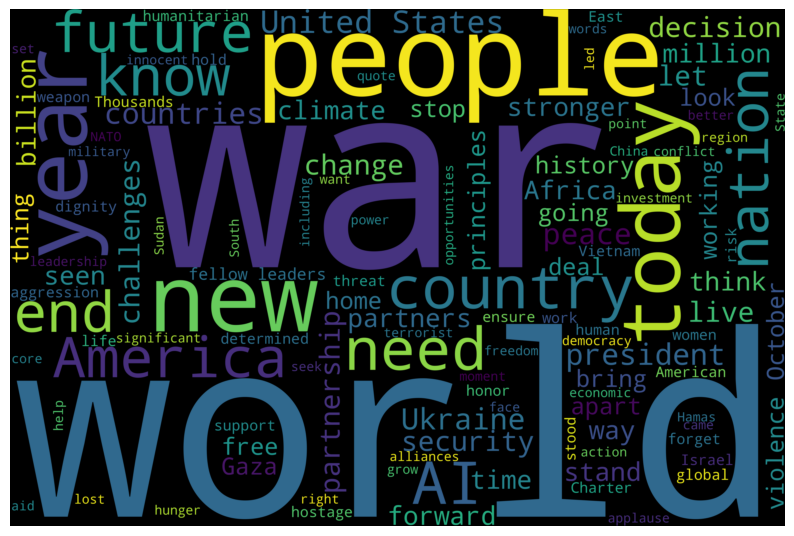

In [14]:
transcript_new = transcript.text[56:]
speech = transcript_new.replace("\n", " ")
speech = speech.replace("\xa0", " ")

nlp = spacy.load('en_core_web_sm')
doc = nlp(speech)

data=[]
for token in doc:
  if((token.is_alpha == True)and(token.is_stop == False)):
    data.append(token.text)

s = " ".join(t for t in data)

wc = WordCloud(min_font_size=12, max_words=120, background_color="black", width=6000, height=4000).generate(s)

plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [4]:
base_image_path = "president.png"
base_image = np.array(Image.open(base_image_path))

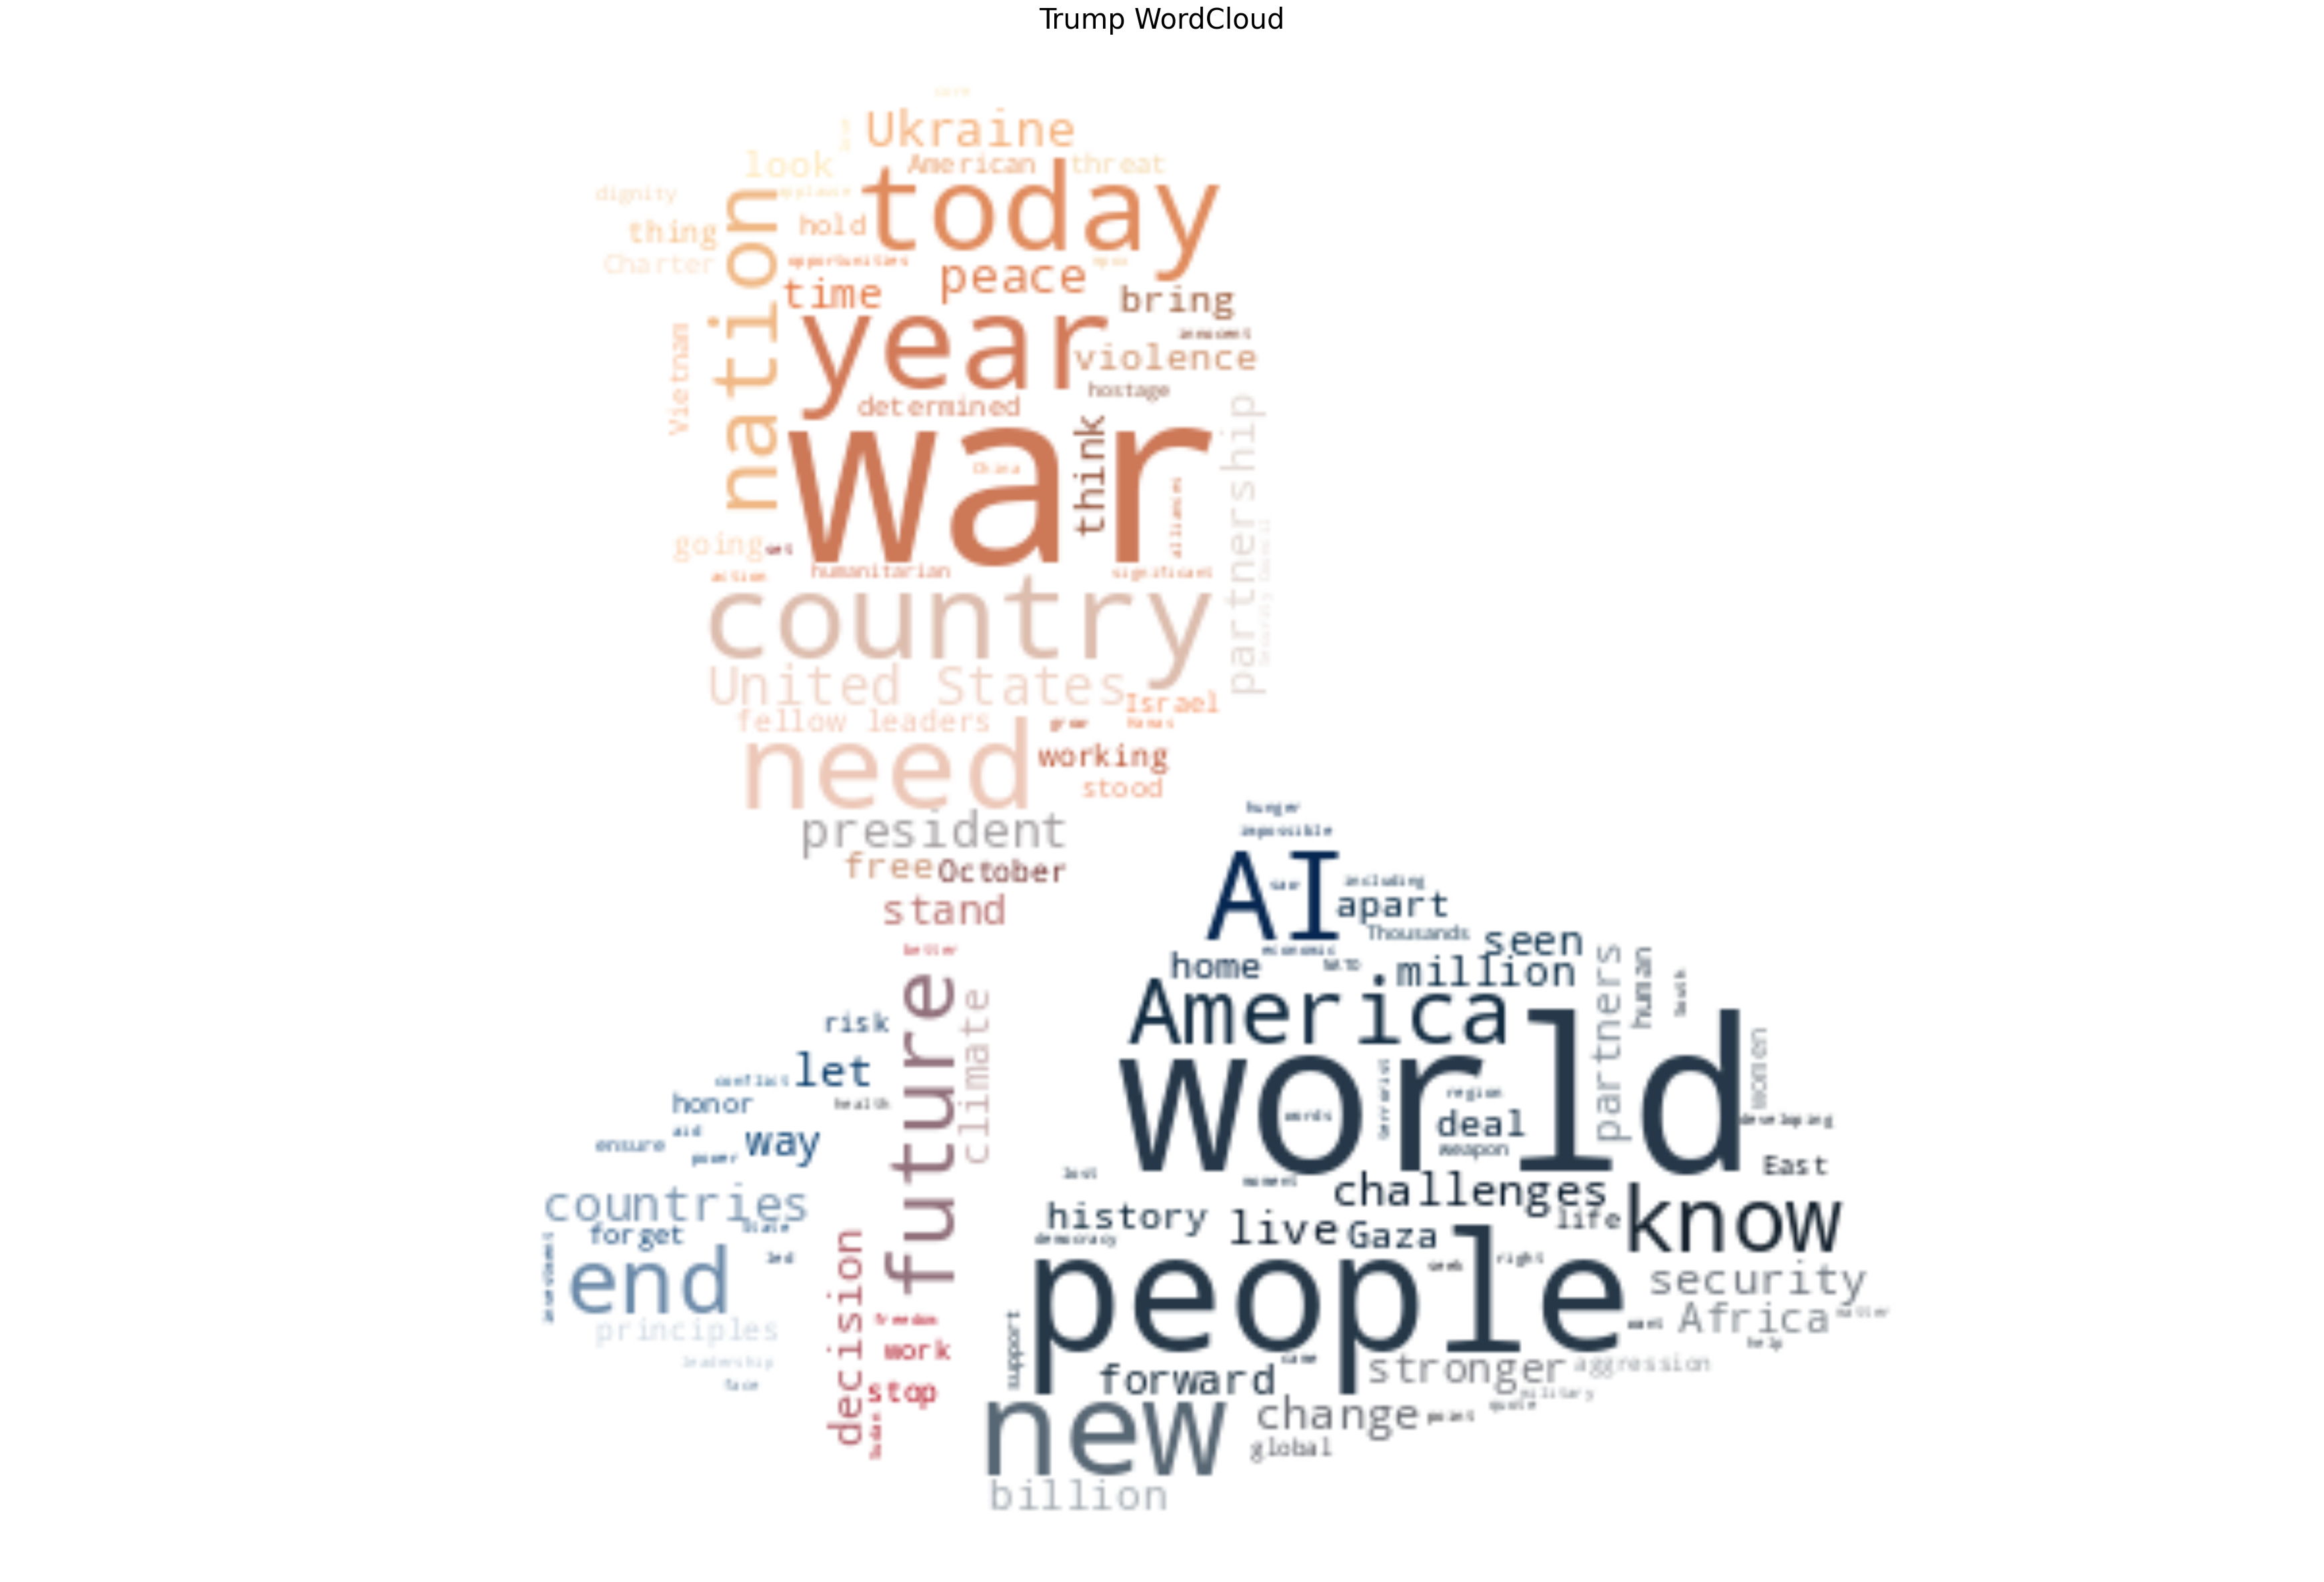

In [5]:
wordcloud = WordCloud(width=800, height=400, background_color="white", mask=base_image, contour_color="black")
wordcloud.generate(s)

image_colors = ImageColorGenerator(base_image)
wordcloud.recolor(color_func=image_colors)

plt.figure(figsize=(50, 30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Trump WordCloud", fontsize=30)
plt.show()

<ipython-input-15-30edddcf539a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


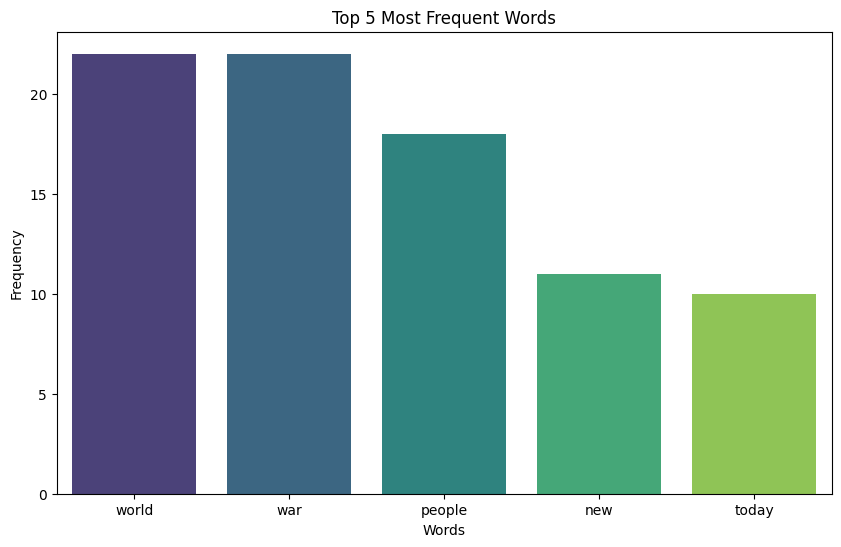

In [15]:
data = [token.text for token in doc if token.is_alpha and not token.is_stop]

# Count word frequencies
word_counts = Counter(data)

# Get the top 5 most frequent words
top_5_words = word_counts.most_common(5)

# Unzip the top 5 words and their counts
words, counts = zip(*top_5_words)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.title("Top 5 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()